C:\Users\jipyeong\AppData\Local\Temp\ipykernel_15140\3736625770.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


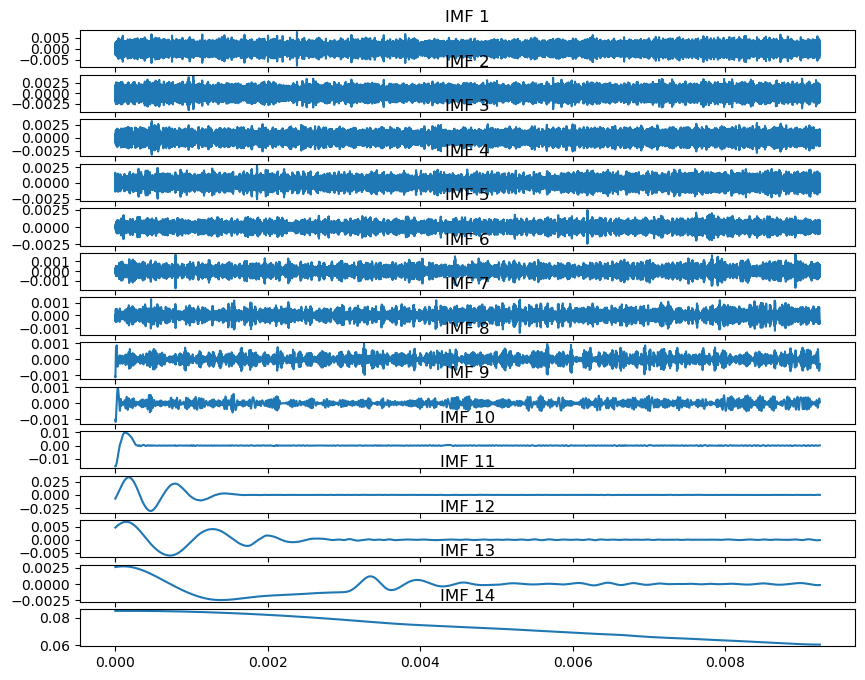

In [2]:
import numpy as np
import pandas as pd
from PyEMD import EMD
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = 'C1Trace00001.csv'  # 파일 경로를 적절히 변경하세요.
data = pd.read_csv(file_path)

# 열 이름 설정
data.columns = ['Time', 'Voltage']

# 음수 시간 데이터 제거
filtered_data = data[data['Time'] >= 0].reset_index(drop=True)

# 시간과 전압 데이터 추출
time = filtered_data['Time'].to_numpy()
voltage = filtered_data['Voltage'].to_numpy()

# EMD 수행
emd = EMD()
imfs = emd.emd(voltage)  # EMD 수행: emd(voltage)가 아닌 emd.emd(voltage)로 수정

# IMF 시각화
plt.figure(figsize=(10, 8))
for i in range(imfs.shape[0]):
    plt.subplot(imfs.shape[0], 1, i + 1)
    plt.plot(time, imfs[i])
    plt.title(f'IMF {i+1}')
plt.tight_layout()
plt.show()




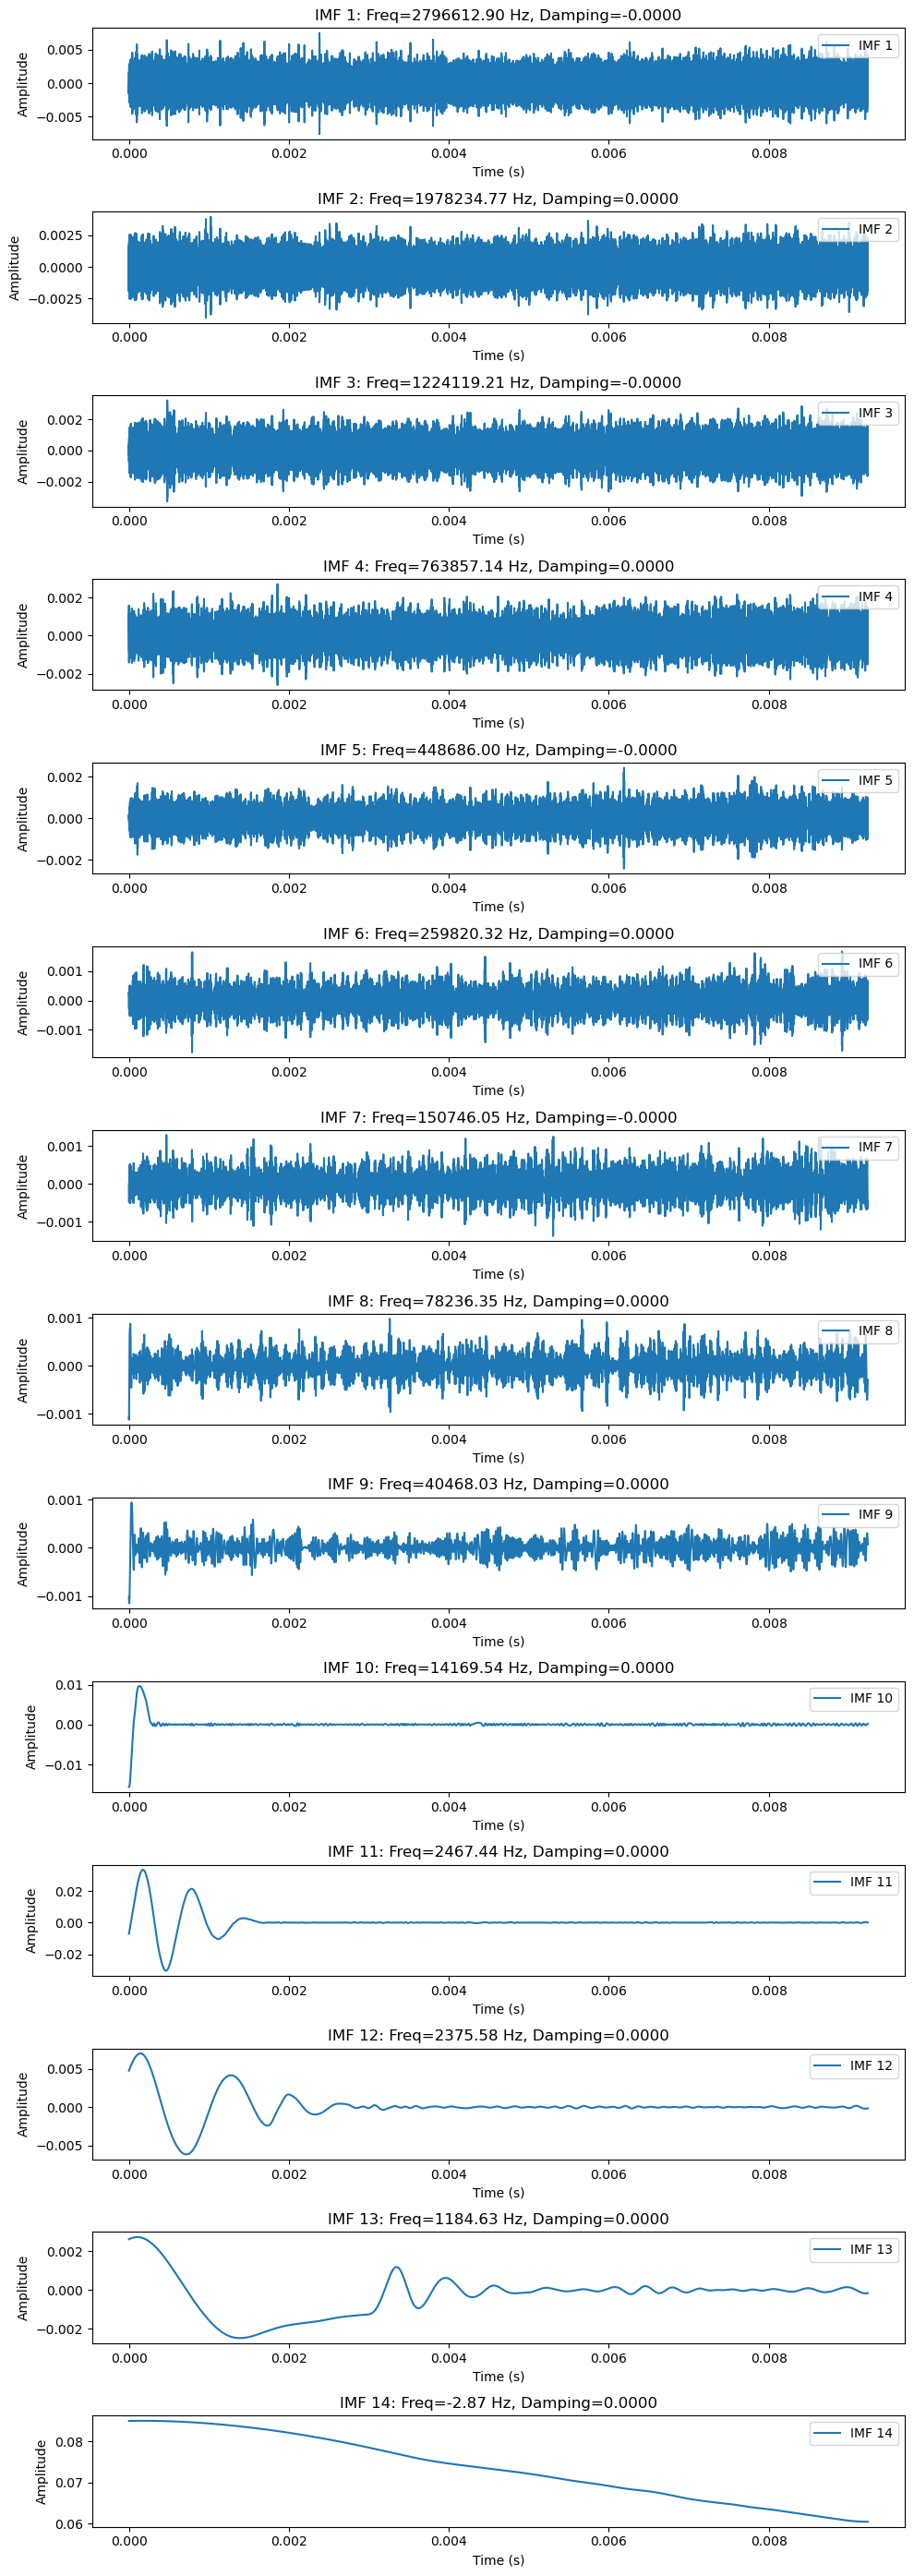

In [5]:
import numpy as np
import pandas as pd
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# CSV 파일 불러오기
file_path = 'C1Trace00001.csv'  # 파일 경로를 적절히 변경하세요.
data = pd.read_csv(file_path)

# 열 이름 설정
data.columns = ['Time', 'Voltage']

# 음수 시간 데이터 제거
filtered_data = data[data['Time'] >= 0].reset_index(drop=True)

# 시간과 전압 데이터 추출
time = filtered_data['Time'].to_numpy()
voltage = filtered_data['Voltage'].to_numpy()

# EMD 수행
emd = EMD()
imfs = emd.emd(voltage)

# 각 IMF의 Hilbert Transform을 사용하여 즉시 주파수와 감쇠비 계산
fig, axes = plt.subplots(len(imfs), 1, figsize=(10, 28))

for i, imf in enumerate(imfs):
    # Hilbert 변환을 사용하여 즉시 주파수 계산
    analytic_signal = hilbert(imf)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi * np.diff(time))
    
    # 감쇠비 계산: 로그 감쇠비법 사용 (단순화된 모델)
    log_dec = -np.diff(np.log(amplitude_envelope))
    damping_ratio = np.mean(log_dec) / (2 * np.pi)
    
    # IMF 시각화
    axes[i].plot(time, imf, label=f'IMF {i+1}')
    axes[i].legend(loc='upper right')
    axes[i].set_title(f'IMF {i+1}: Freq={np.mean(instantaneous_frequency):.2f} Hz, Damping={damping_ratio:.4f}')
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import pandas as pd
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# CSV 파일 불러오기
file_path = 'C1Trace00001.csv'  # 파일 경로를 적절히 변경하세요.
data = pd.read_csv(file_path)

# 열 이름 설정
data.columns = ['Time', 'Voltage']

# 음수 시간 데이터 제거
filtered_data = data[data['Time'] >= 0].reset_index(drop=True)

# 시간과 전압 데이터 추출
time = filtered_data['Time'].to_numpy()
voltage = filtered_data['Voltage'].to_numpy()

# EMD 수행
emd = EMD()
imfs = emd.emd(voltage)

# IMF의 Hilbert Transform을 사용하여 즉시 주파수와 감쇠비 계산
fig, axes = plt.subplots(len(imfs), 1, figsize=(12, 28),dpi=600)  # figsize 매개변수 수정 (가로, 세로 크기 조정)

for i, imf in enumerate(imfs):
    # Hilbert 변환을 사용하여 즉시 주파수 계산
    analytic_signal = hilbert(imf)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi * np.diff(time))
    
    # 주파수를 kHz 단위로 변환
    instantaneous_frequency_kHz = instantaneous_frequency / 1000  # Hz에서 kHz로 변환
    
    # 감쇠비 계산: 로그 감쇠비법 사용 (단순화된 모델)
    log_dec = -np.diff(np.log(amplitude_envelope))
    damping_ratio = np.mean(log_dec) / (2 * np.pi)
    
    # IMF 시각화
    axes[i].plot(time[:-1], imf[:-1], label=f'IMF {i+1}')
    axes[i].legend(loc='upper right')
    axes[i].set_title(f'IMF {i+1}: Freq={np.mean(instantaneous_frequency_kHz):.2f} kHz, Damping={damping_ratio:.4f}')
    axes[i].set_xlabel('Time (s)')
    axes[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from PyEMD import EMD
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# CSV 파일 불러오기
file_path = 'C1Trace00001.csv'  # 파일 경로를 적절히 변경하세요.
data = pd.read_csv(file_path)

# 열 이름 설정
data.columns = ['Time', 'Voltage']

# 음수 시간 데이터 제거
filtered_data = data[data['Time'] >= 0].reset_index(drop=True)

# 시간과 전압 데이터 추출
time = filtered_data['Time'].to_numpy()
voltage = filtered_data['Voltage'].to_numpy()

# EMD 수행
emd = EMD()
imfs = emd.emd(voltage)

# 서브플롯 생성 (오리지널 데이터 포함하여 총 IMF 개수 + 1)
fig, axes = plt.subplots(len(imfs) + 1, 1, figsize=(12, 30),dpi=600)

# 오리지널 데이터 시각화
axes[0].plot(time, voltage, label='Original Data')
axes[0].legend(loc='upper right')
axes[0].set_title('Original Data')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')

# 각 IMF의 Hilbert Transform을 사용하여 즉시 주파수와 감쇠비 계산
for i, imf in enumerate(imfs):
    # Hilbert 변환을 사용하여 즉시 주파수 계산
    analytic_signal = hilbert(imf)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi * np.diff(time))
    
    # 주파수를 kHz 단위로 변환
    instantaneous_frequency_kHz = instantaneous_frequency / 1000  # Hz에서 kHz로 변환
    
    # 감쇠비 계산: 로그 감쇠비법 사용 (단순화된 모델)
    log_dec = -np.diff(np.log(amplitude_envelope))
    damping_ratio = np.mean(log_dec) / (2 * np.pi)
    
    # IMF 시각화
    axes[i + 1].plot(time[:-1], imf[:-1], label=f'IMF {i+1}')
    axes[i + 1].legend(loc='upper right')
    axes[i + 1].set_title(f'IMF {i+1}: Freq={np.mean(instantaneous_frequency_kHz):.2f} kHz, Damping={damping_ratio:.4f}')
    axes[i + 1].set_xlabel('Time (s)')
    axes[i + 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()
